# Advanced Regression - Ridge and Lasso
## Surprise Housing Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Essentially, the company wants —


- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Following steps for final model:

1) Reading and understanding the data

2) Visualizing the data

3) Preparing the data for model training 

4) Splitting the Data into Training and Testing Sets

5) Linear Regression

6) Ridge Regression

7) Lasso Regression

# Step 1: Reading and Understanding the Data

Let us first import libraries for model building

In [1]:
#Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
pd.set_option('display.max_columns', 100)

import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# ibrary used to build linear model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Reading data from dataset
surprise_housing_data= pd.read_csv("train.csv")

In [3]:
# Check the head of the dataset
surprise_housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Inspect various aspects of the surprise_housing_data dataframe

In [4]:
#Shape of dataset
surprise_housing_data.shape

(1460, 81)

In [5]:
surprise_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
surprise_housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking if there are columns with one unique value since it won't affect our analysis
surprise_housing_data.nunique().sort_values(ascending=True)

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

In [8]:
#Identify and calculate the % of missing values in each column
missing_columns = round(100*(surprise_housing_data.isnull().sum()/len(surprise_housing_data.index)), 2)
missing_columns.loc[missing_columns > 0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [9]:
surprise_housing_data.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
surprise_housing_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
surprise_housing_data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [12]:
## Imputing the null values with proper data as those columns are useful for analysis due to its business significance
surprise_housing_data['PoolQC'] = surprise_housing_data['PoolQC'].fillna('No Pool')
surprise_housing_data['MiscFeature'] = surprise_housing_data['MiscFeature'].fillna('None')
surprise_housing_data['Alley'] = surprise_housing_data['Alley'].fillna('No Alley Access')
surprise_housing_data['Fence'] = surprise_housing_data['Fence'].fillna('No Fence')
surprise_housing_data['FireplaceQu'] = surprise_housing_data['FireplaceQu'].fillna('No Fireplace')
surprise_housing_data['MasVnrType'] = surprise_housing_data['MasVnrType'].fillna('None')
surprise_housing_data['Electrical'] = surprise_housing_data['Electrical'].fillna("Other")

## Imputing GarageYrBlt, MasVnrArea with midean value.
surprise_housing_data['GarageYrBlt'] = surprise_housing_data['GarageYrBlt'].fillna(surprise_housing_data["GarageYrBlt"].median(), inplace=True)
surprise_housing_data['MasVnrArea'] = surprise_housing_data['MasVnrArea'].fillna(surprise_housing_data["MasVnrArea"].median(), inplace=True)

In [13]:
# Imputing the Nan Values with 'No Basement'
for var in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    surprise_housing_data[var] = surprise_housing_data[var].fillna('No Basement')

In [14]:
#Imputing the NaN values with 'No garage' 
for var in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    surprise_housing_data[var] = surprise_housing_data[var].fillna('No Garage')

In [15]:
#Identify and calculate the % of missing values in each column
missing_columns = round(100*(surprise_housing_data.isnull().sum()/len(surprise_housing_data.index)), 2)
missing_columns.loc[missing_columns > 0].sort_values(ascending=False)

MasVnrArea     100.00
GarageYrBlt    100.00
LotFrontage     17.74
dtype: float64

In [16]:
surprise_housing_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
## LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.
surprise_housing_data.drop("LotFrontage",axis = 1, inplace=True)

In [18]:
surprise_housing_data.shape

(1460, 80)

In [19]:
#Confirming the missing values after imputation and dropping unwanted variables
round((surprise_housing_data.isnull().sum()/len(surprise_housing_data.index) *100),2).sort_values(ascending=False)

GarageYrBlt    100.0
MasVnrArea     100.0
Id               0.0
Electrical       0.0
GarageType       0.0
               ...  
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
SalePrice        0.0
Length: 80, dtype: float64



# Step 2: Visualising the Data and performing EDA

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable


In [20]:
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
surprise_housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876


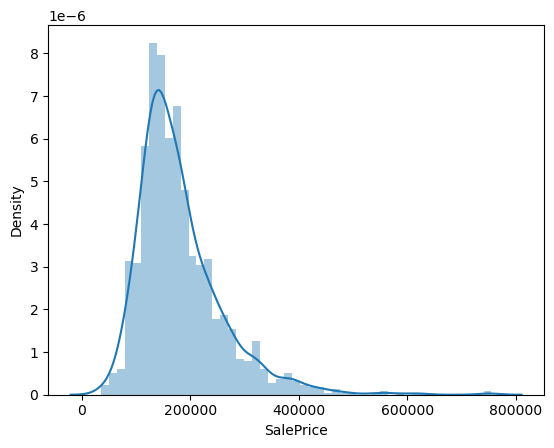

In [21]:
#Let's find out if the target variable is normally distributed??
sns.distplot(surprise_housing_data['SalePrice']) 
#skewness
print("Skewness: %f" % surprise_housing_data['SalePrice'].skew())

In [22]:
#Tranforming to form normal disribution
surprise_housing_data['SalePrice']=np.log(surprise_housing_data.SalePrice) 
surprise_housing_data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Skewness: 0.121335


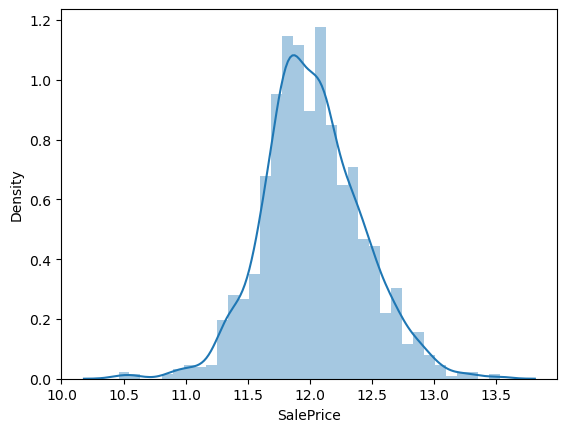

In [23]:
# Checking if data is Normally distributed or not after converting the target to log form
sns.distplot(surprise_housing_data['SalePrice'])

print("Skewness: %f" % surprise_housing_data['SalePrice'].skew())

### Visualising Numeric Variables


In [24]:
#Getting all numerical variables
NumericVars = surprise_housing_data.select_dtypes(include = np.number).columns.tolist()
NumericVars.remove('SalePrice')
NumericVars

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

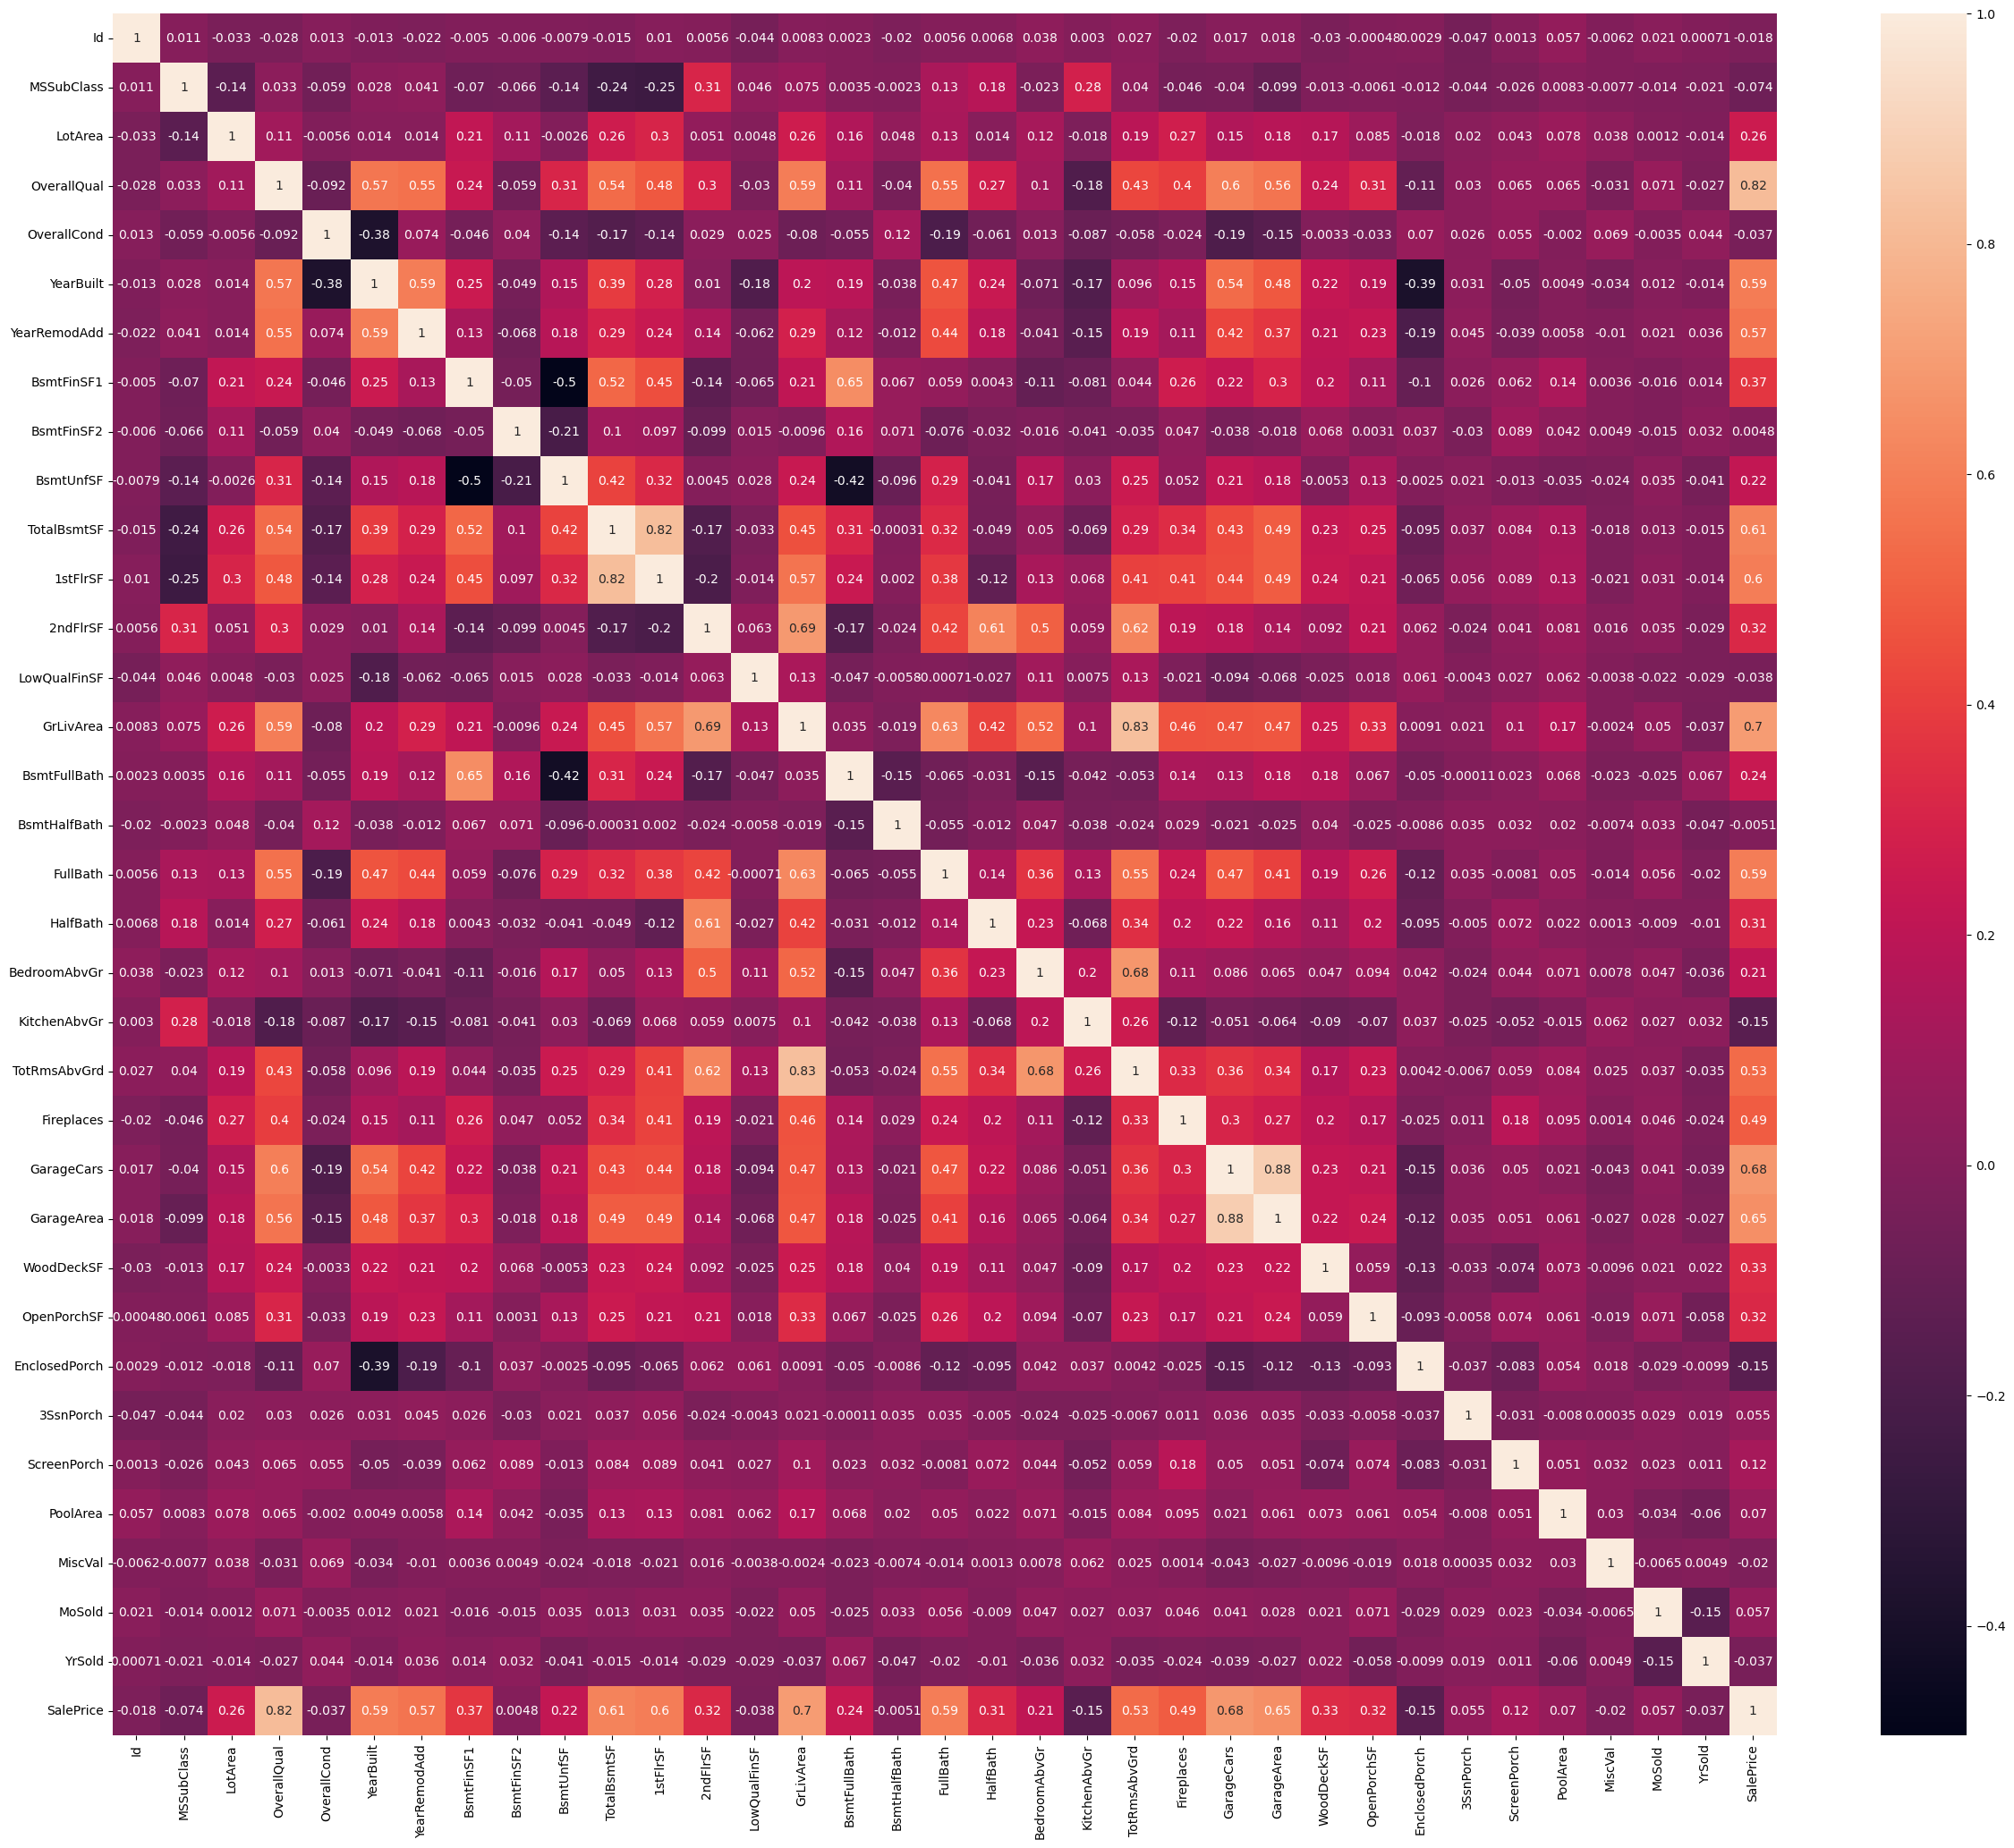

In [25]:
#Visualizing correlation matrix
plt.figure(figsize = (30, 25))
sns.heatmap(surprise_housing_data.corr(), annot = True)
plt.show()


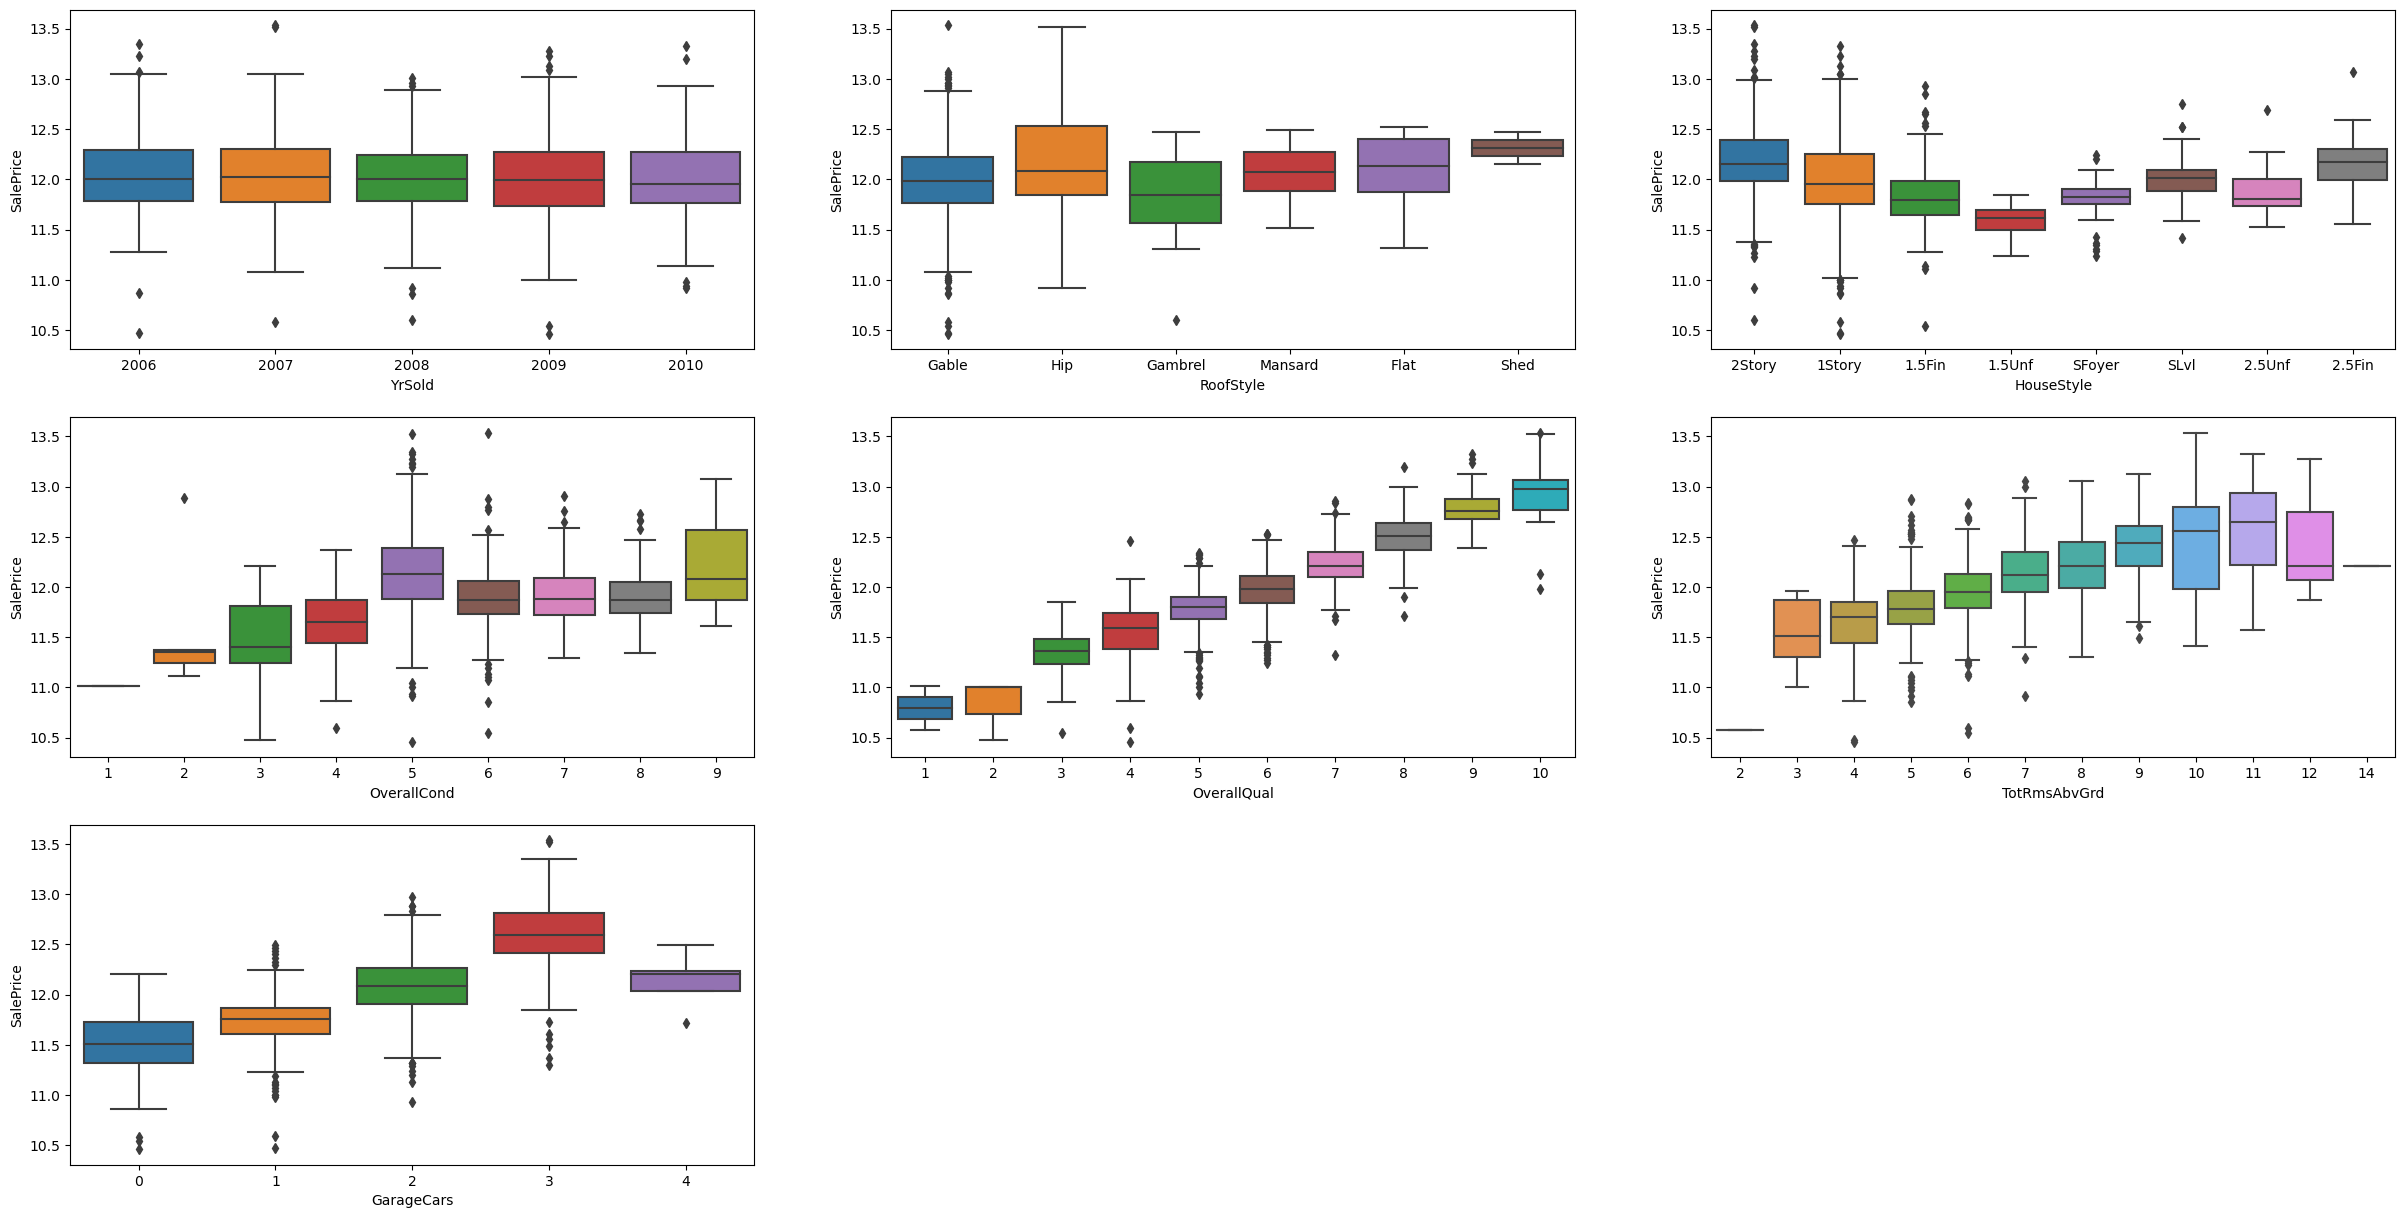

In [26]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = surprise_housing_data)
plt.show()

In [27]:
#Dropping the outliers from the numeric variables
for var in NumericVars:
        Q1 = surprise_housing_data[var].quantile(.25)
        Q3 = surprise_housing_data[var].quantile(.99)
        IQR = Q3-Q1
        surprise_housing_data =  surprise_housing_data[(surprise_housing_data[var] >= (Q1-(1.5*IQR))) & (surprise_housing_data[var] <= (Q3+(1.5*IQR)))] 

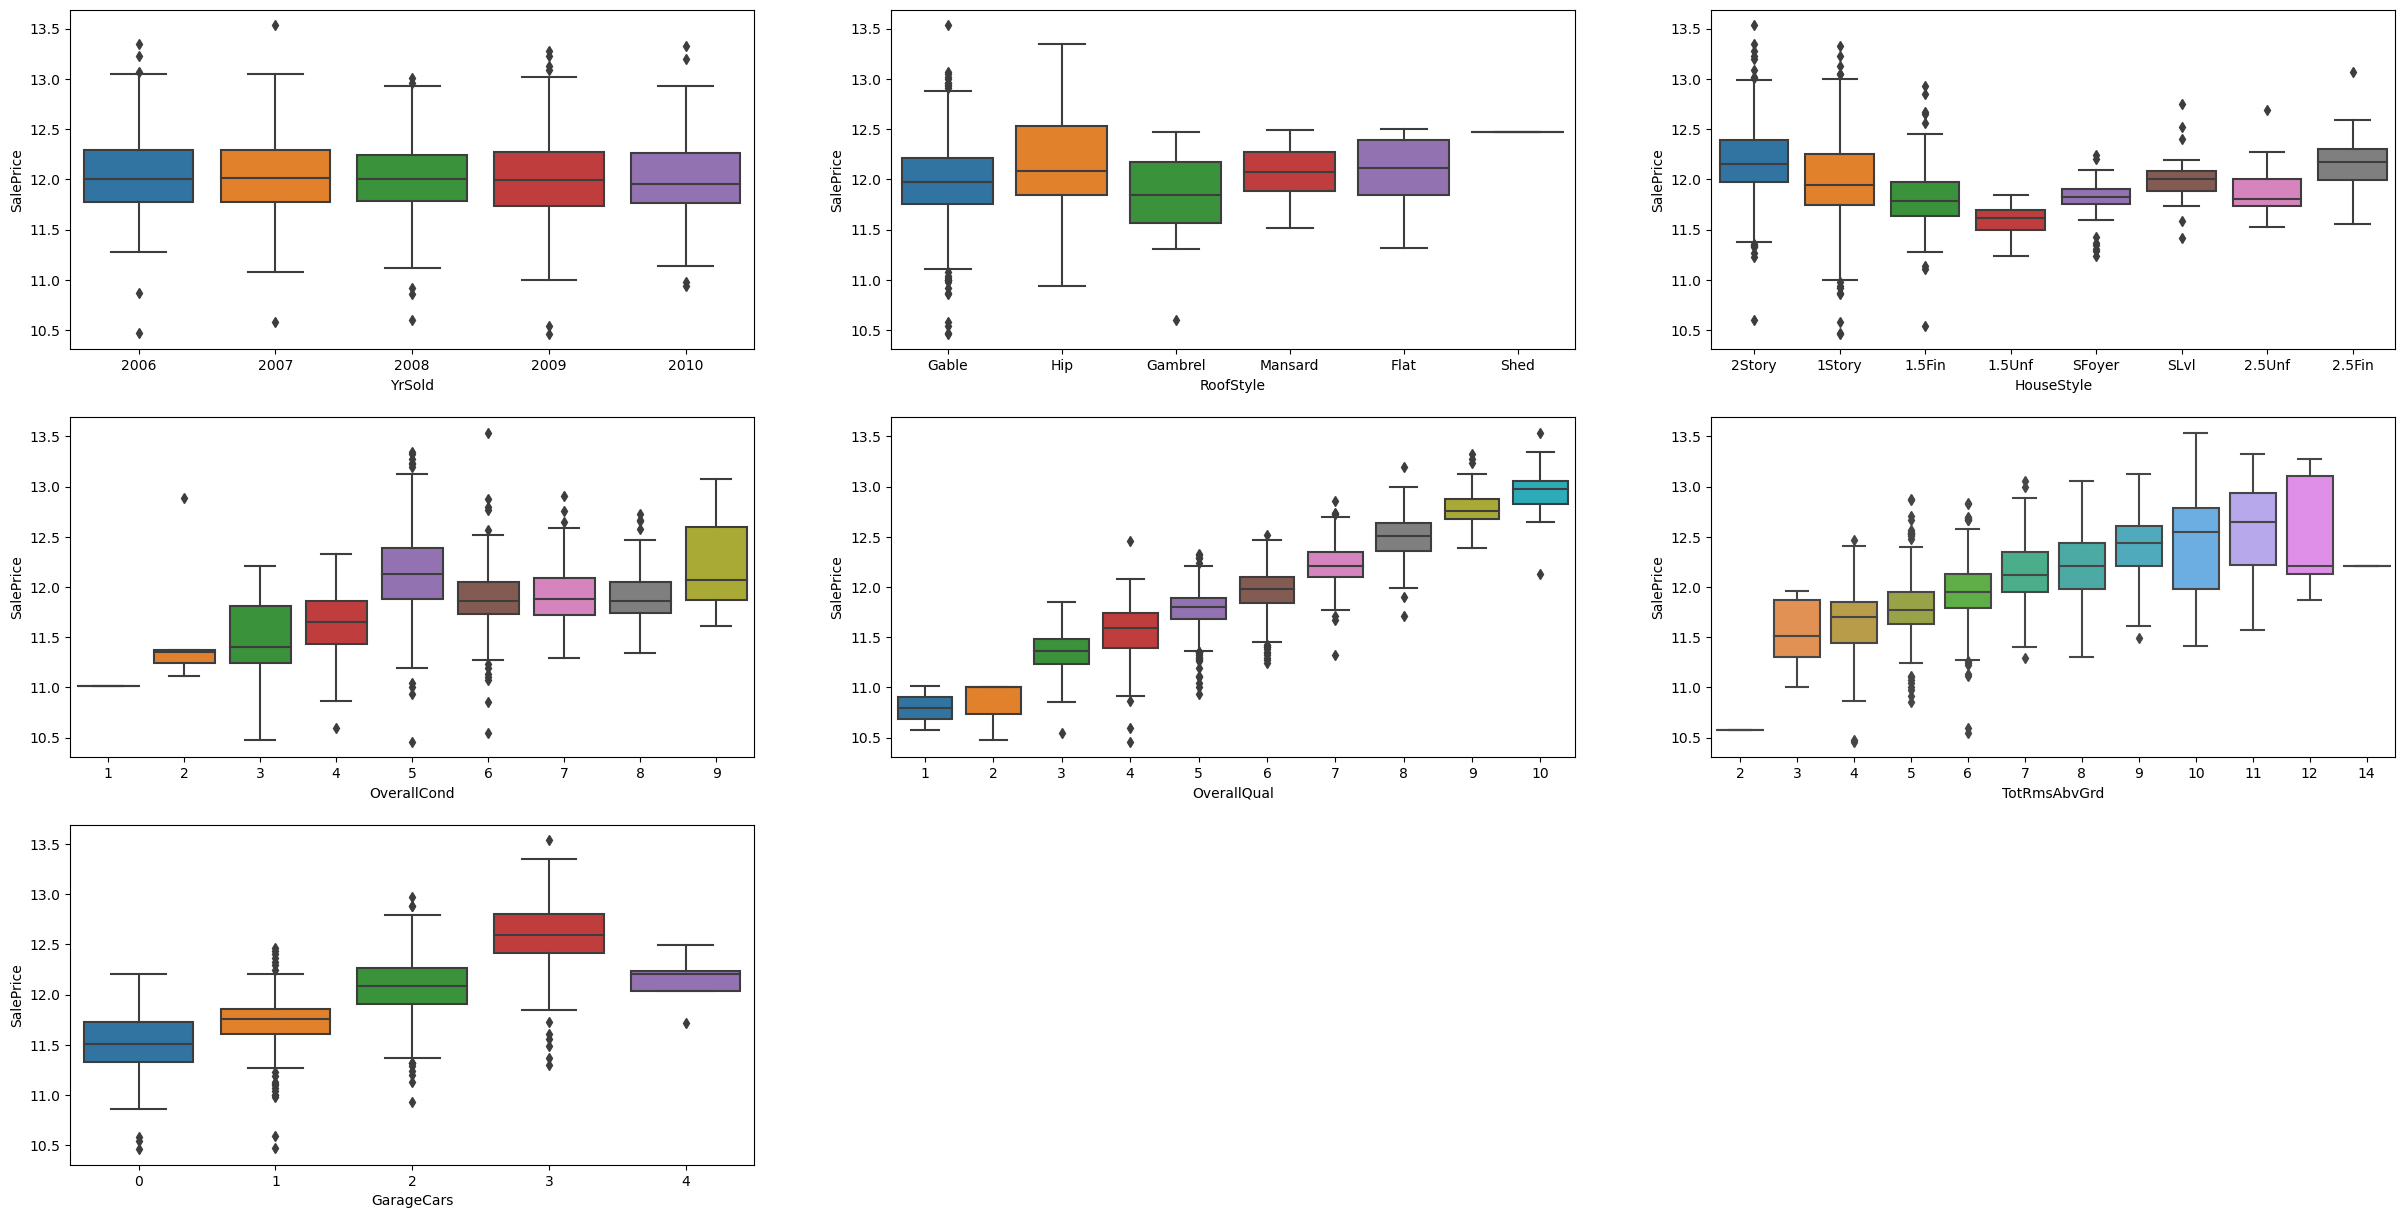

In [28]:
#visualizing the data after outlier removal
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = surprise_housing_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = surprise_housing_data)
plt.show()

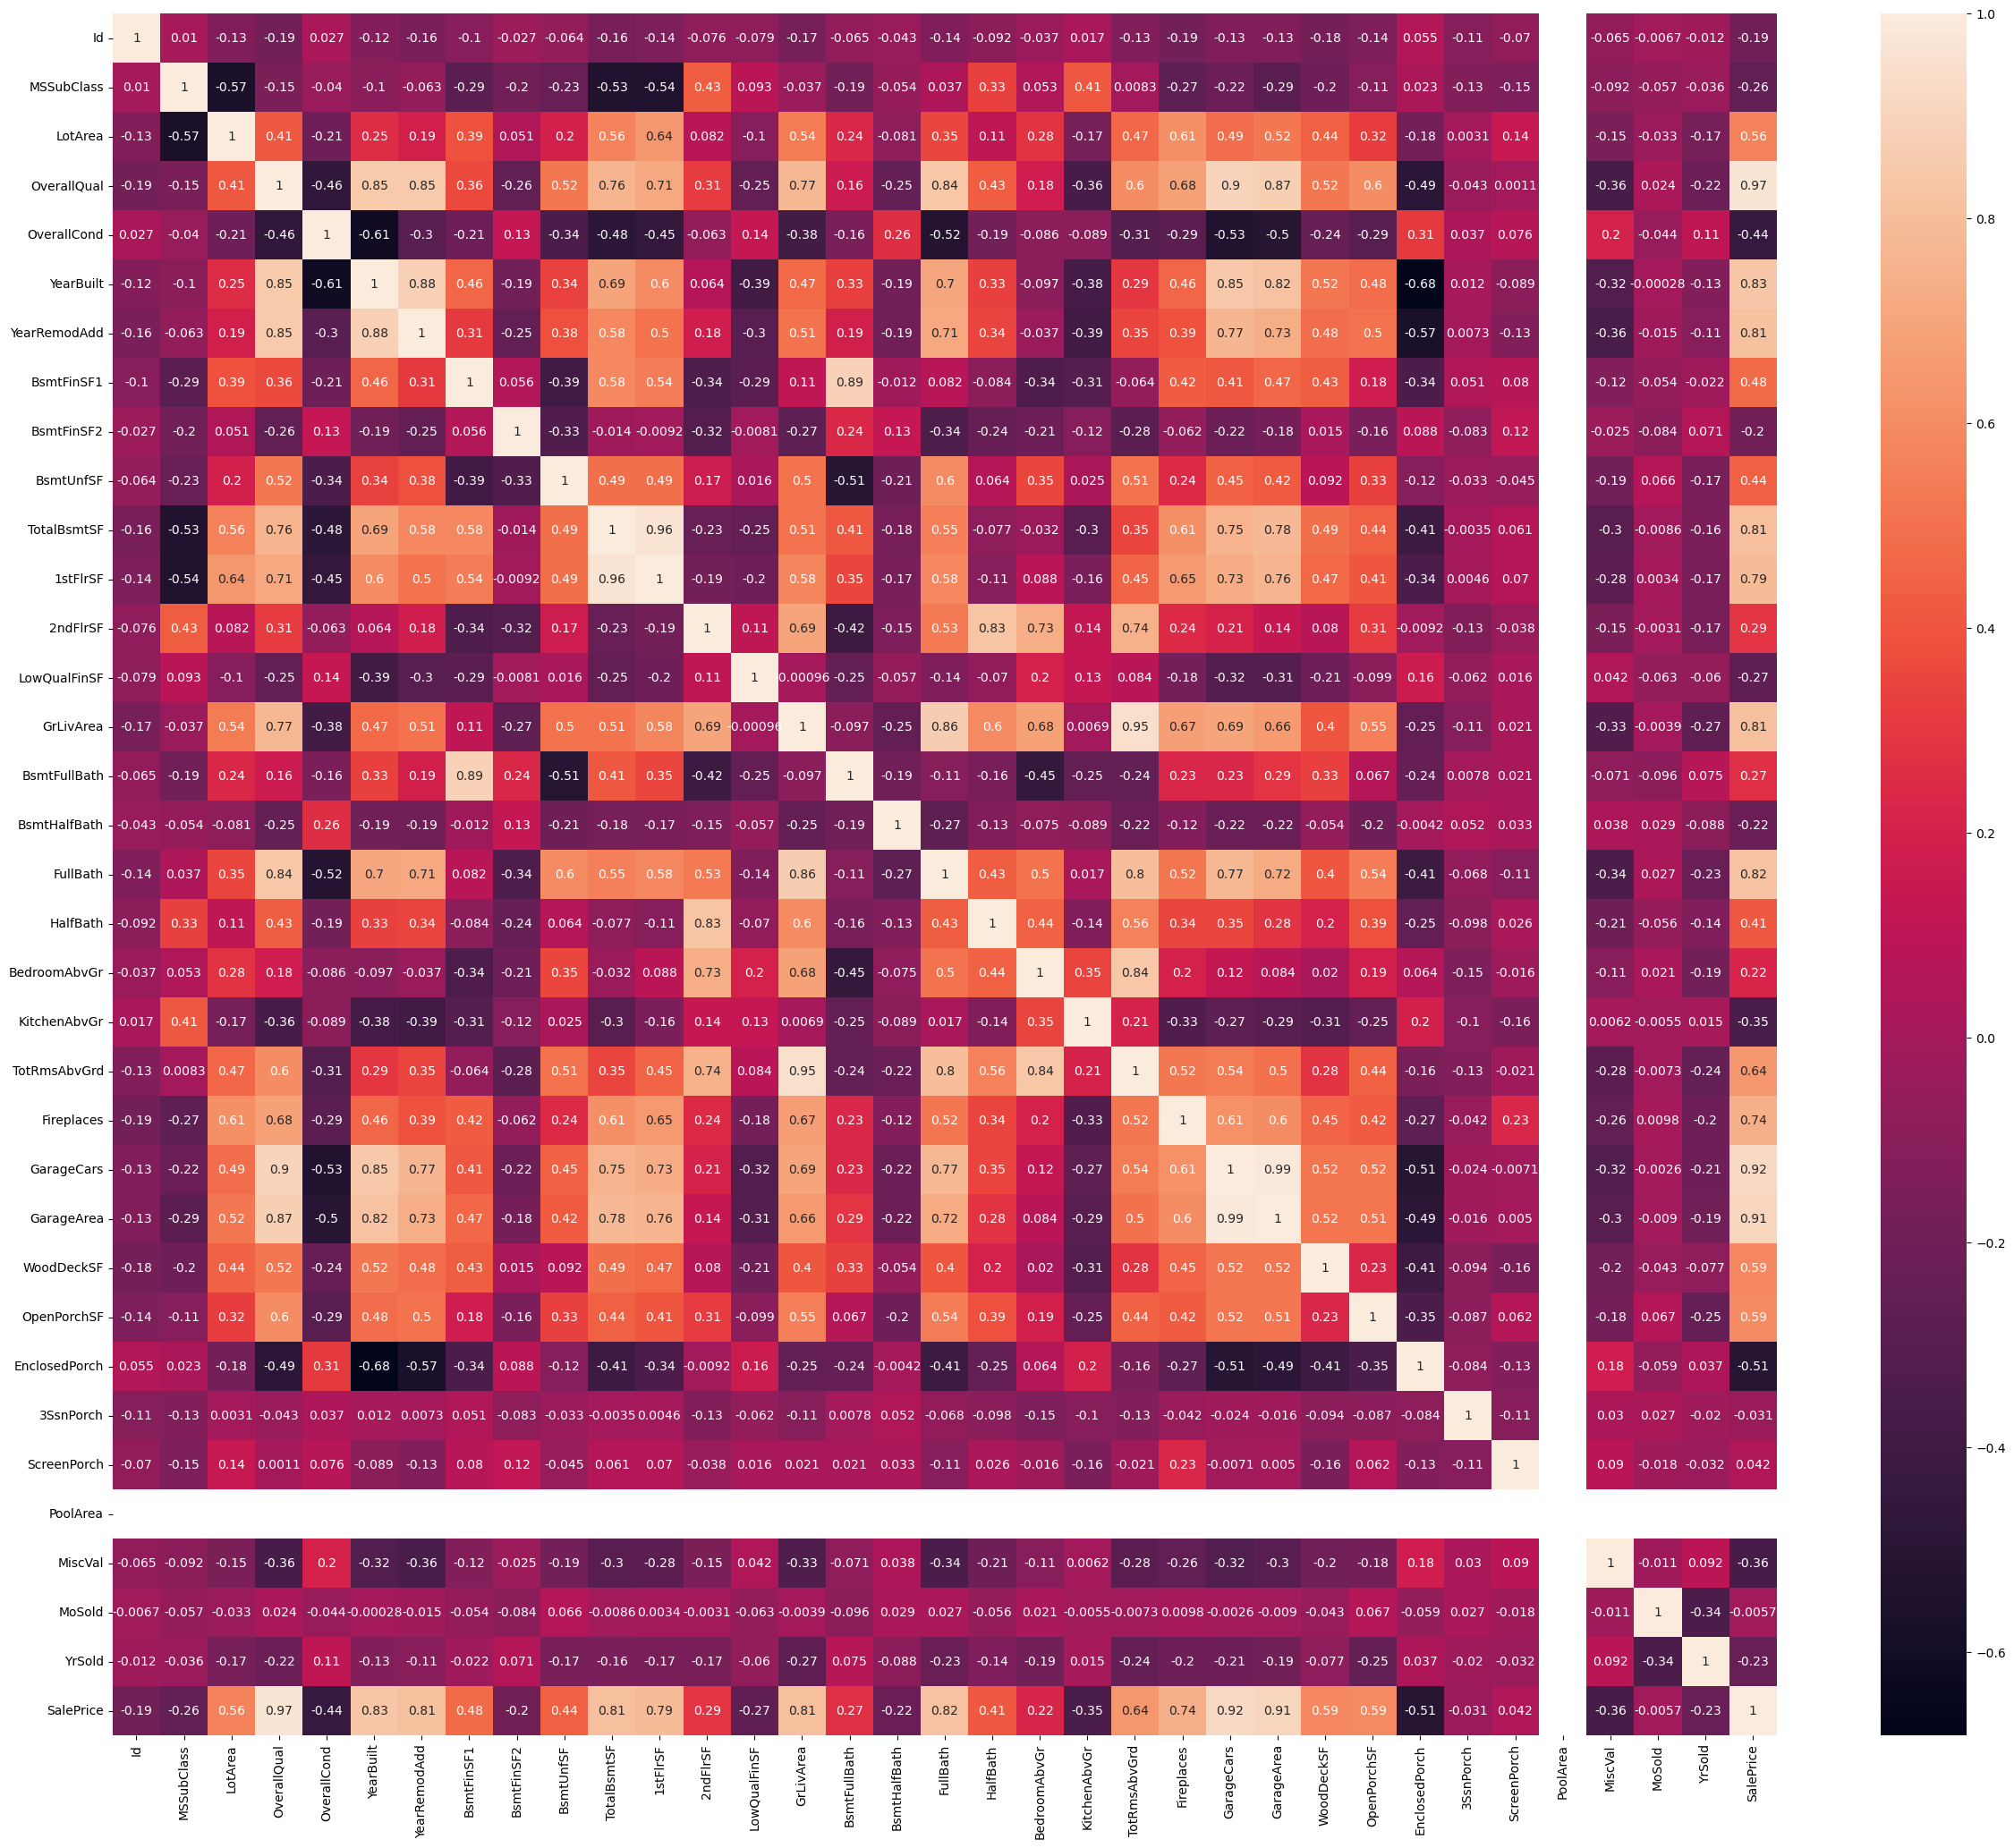

In [29]:
#Visualizing correlation matrix
plt.figure(figsize = (30, 25))
housing_data_corr = surprise_housing_data.corr()
sns.heatmap(housing_data_corr.corr(), annot = True)
plt.show()

In [30]:
#Checking value count of PoolArea as we are getting no relation there
surprise_housing_data.PoolArea.value_counts()

0    1440
Name: PoolArea, dtype: int64

In [31]:
#Dropping this variable as all the values are '0' , hence it is not a significant varaible
surprise_housing_data = surprise_housing_data.drop(['PoolArea'], axis = 1) 

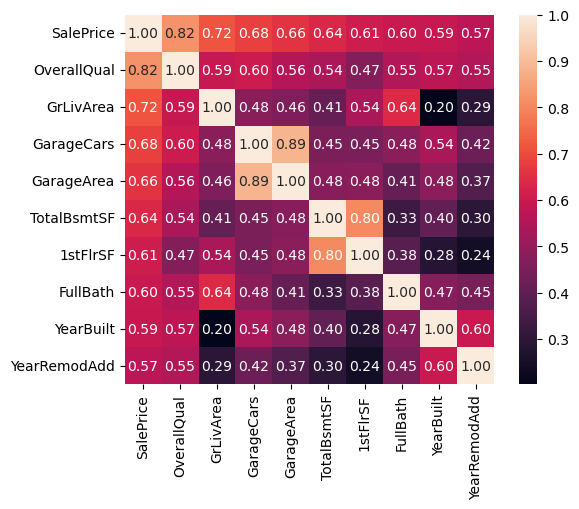

In [32]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
housing_data_corr = surprise_housing_data.corr()
cols = housing_data_corr.nlargest(k, 'SalePrice')['SalePrice'].index
corr_mat = np.corrcoef(surprise_housing_data[cols].values.T)
hm = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
#list of datatype in corelation table 
corr_var = surprise_housing_data[list(surprise_housing_data.dtypes[surprise_housing_data.dtypes != 'object'].index)].corr()
#printing highly corelated data columns
corr_coef = corr_var[corr_var['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.821276
GrLivArea       0.715089
GarageCars      0.684140
GarageArea      0.658408
TotalBsmtSF     0.636467
1stFlrSF        0.607344
FullBath        0.595594
YearBuilt       0.593053
YearRemodAdd    0.571169
TotRmsAbvGrd    0.539538
Name: SalePrice, dtype: float64


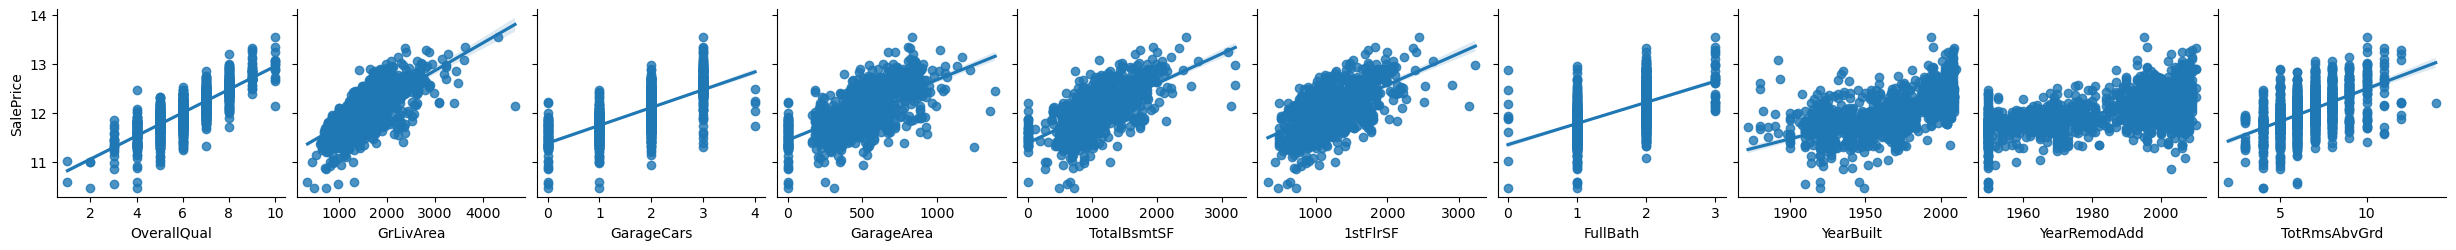

In [34]:
#pairplot of corr features having high corelation
sns.pairplot(surprise_housing_data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )
plt.show()

In [35]:
#Getting all the numeric variables one more time after removing the unwanted numeric variables
NumericVars = surprise_housing_data.select_dtypes(include = np.number).columns.tolist()
NumericVars

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Visualising Categorical Variables


In [36]:
#Get all categorical variables
CategoricalVars = surprise_housing_data.select_dtypes(include = np.object).columns.tolist()
for var in CategoricalVars:
    print(var,' : ',surprise_housing_data[var].unique())
    print(surprise_housing_data[var].value_counts())

MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1132
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street  :  ['Pave' 'Grvl']
Pave    1435
Grvl       5
Name: Street, dtype: int64
Alley  :  ['No Alley Access' 'Grvl' 'Pave']
No Alley Access    1349
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
Reg    915
IR1    478
IR2     39
IR3      8
Name: LotShape, dtype: int64
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1296
Bnk      62
HLS      49
Low      33
Name: LandContour, dtype: int64
Utilities  :  ['AllPub' 'NoSeWa']
AllPub    1439
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1042
Corner      257
CulDSac      90
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Gtl    1366
Mod      65
Sev       9
Name: LandSlope, dtype: int64
Neighborhood  :  ['CollgCr' 'V

In [37]:
#Dropping following variables as only one value has maximum concentration so it would not be of any use in analysis
surprise_housing_data = surprise_housing_data.drop(['PoolQC'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['Condition2'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['RoofMatl'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['BsmtFinType2'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['Heating'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['Functional'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['GarageQual'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['GarageCond'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['MiscFeature'], axis = 1) 
surprise_housing_data = surprise_housing_data.drop(['PavedDrive'], axis = 1) 

In [38]:
#Dropping ID variable
surprise_housing_data = surprise_housing_data.drop(['Id'], axis = 1) 
NumericVars.remove('Id')

# Step 3: Data Preparation

## Dummy Variables

In [39]:
#Getting all categorical variables once again after removing the unwanted variables
CategoricalVars = surprise_housing_data.select_dtypes(include = np.object).columns.tolist()

#Creating the dummy variables
surprise_housing_data_dummy_var = pd.get_dummies(data=surprise_housing_data, columns = CategoricalVars, drop_first=True)
surprise_housing_data_dummy_var.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,2,2008,12.247694,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,5,2007,12.109011,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,9,2008,12.317167,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,2,2006,11.849398,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,12,2008,12.429216,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Step 4: Splitting the Data into Training and Testing Sets


In [40]:
#X Independent variables and y target variable
X = surprise_housing_data_dummy_var.drop(['SalePrice'], axis=1)
y = surprise_housing_data_dummy_var['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [41]:
#Verifying the data rows in each data set
print("Total: ",surprise_housing_data_dummy_var.shape)
print("X Train: ",X_train.shape)
print("X Test: ",X_test.shape)
print("y Train: ",y_train.shape)
print("y Test: ",y_test.shape)

Total:  (1440, 207)
X Train:  (1007, 206)
X Test:  (433, 206)
y Train:  (1007,)
y Test:  (433,)


In [42]:
#Creating scaler object
scaler = StandardScaler()

In [43]:
# Applying scaler() to all the columns except the 'categorical' and 'dummy' variables
NumericVars.remove('SalePrice')
X_train[NumericVars] = scaler.fit_transform(X_train[NumericVars])

In [44]:
#Validating if scaled values are within 0 to 1 range
print(NumericVars)
X_train.head()

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1305,-0.876491,0.545927,2.226049,-0.548984,1.156123,1.086266,2.677817,-0.290808,-1.114568,1.554493,1.433540,-0.795376,-0.114573,0.324088,1.134124,-0.236317,0.832010,-0.761545,-1.090084,-0.211419,-0.286512,2.174516,0.347507,1.814152,2.652132,0.866105,-0.373429,-0.117079,-0.282431,-0.156856,1.789928,0.895479,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
876,-0.876491,2.654298,-1.573326,-0.548984,-0.264539,-1.028978,0.470365,-0.290808,-0.313104,0.049402,-0.309320,-0.795376,-0.114573,-0.930531,1.134124,-0.236317,-1.001325,-0.761545,0.173109,-0.211419,-0.929092,-0.953681,0.347507,0.884230,-0.745370,-0.700332,-0.373429,-0.117079,-0.282431,-0.156856,-1.992774,-0.604933,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
888,-0.876491,1.014493,1.466174,0.344113,-0.033268,-0.692462,-0.192576,5.191067,1.084322,3.000711,3.042552,-0.795376,-0.114573,1.482355,1.134124,-0.236317,0.832010,-0.761545,1.436302,-0.211419,0.998646,0.610418,0.347507,0.753460,-0.064187,2.478615,-0.373429,-0.117079,3.647694,-0.156856,1.411658,-0.604933,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
426,0.549208,0.481003,0.706299,-0.548984,0.594466,0.220939,2.550871,-0.290808,-1.297238,1.211496,1.410757,-0.795376,-0.114573,0.307688,1.134124,3.938621,0.832010,-0.761545,-1.090084,-0.211419,-0.929092,0.610418,0.347507,0.501606,-0.072597,-0.700332,-0.373429,-0.117079,6.665469,-0.156856,0.655118,0.895479,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1445,0.668016,-0.284854,-0.053576,-0.548984,-0.165423,-0.884757,-0.578116,3.885541,-1.297238,-0.590518,-0.670991,-0.795376,-0.114573,-1.190885,1.134124,-0.236317,-1.001325,-0.761545,0.173109,-0.211419,-0.286512,-0.953681,-1.019444,-1.091854,-0.745370,-0.700332,3.732410,-0.117079,-0.282431,-0.156856,-0.479693,-0.604933,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Step 5: Linear Regression

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Building model using statsmodel, for the detailed statistics

In [46]:

#Define function for linear model using statsmodel
def build_model_sm(X_train_var):
    
    #Adding a constant variable 
    X_train_sm = sm.add_constant(X_train_var)
    lm = sm.OLS(y_train,X_train_sm).fit()  

    #Let's see the summary of our linear model
    print(lm.summary())

    #Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_var
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    return lm

In [47]:
# building basic linear reg model
X_train_cols = X_train[X_train.columns]
lm = build_model_sm(X_train_cols)
lm

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     85.02
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:14:33   Log-Likelihood:                 1106.4
No. Observations:                1007   AIC:                            -1815.
Df Residuals:                     808   BIC:                            -836.7
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

                 Features   VIF
9             TotalBsmtSF   inf
149  BsmtCond_No Basement   inf
146  BsmtQual_No Basement   inf
117    Exterior2nd_CBlock   inf
13              GrLivArea   inf
..                    ...   ...
199          SaleType_Oth  1.24
52   Neighborhood_Blueste  1.24
170      Electrical_Other  1.20
137          ExterCond_Po   NaN
164          HeatingQC_Po   NaN

[206 rows x 2 columns]


### Making Predictions using Linear Regression model

In [48]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
NumericVars

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold']

In [49]:
X_test[NumericVars] = scaler.transform(X_test[NumericVars])

In [50]:
y_train_pred = lm.predict(sm.add_constant(X_train))

In [51]:
X_test_const = X_test[X_train.columns]

# Adding a constant variable 
X_test_const = sm.add_constant(X_test_const)

In [52]:
# Making predictions
y_test_pred = lm.predict(X_test_const)

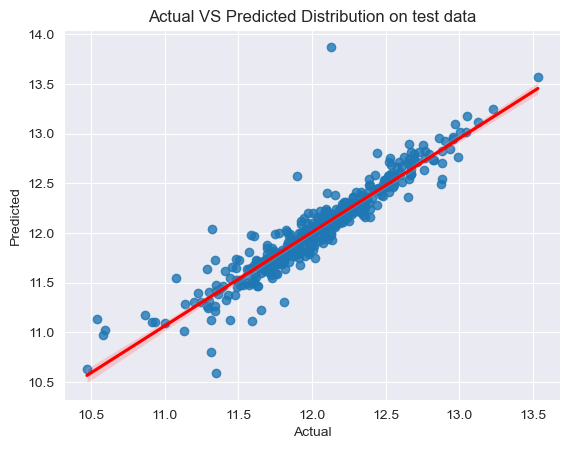

In [53]:
# Comparing Actual VS Predicted Distribution on test data
plt.figure()
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
plt.title('Actual VS Predicted Distribution on test data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# R2 Score for Train and Test Dataset

In [54]:
metric_linear = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Scrore Train:",r2_train_lr)
metric_linear.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Scrore Test:",r2_test_lr)
metric_linear.append(r2_test_lr)

rssTrain_lr = np.sum(np.square(y_train - y_train_pred))
print("Train RSS:",rssTrain_lr)
metric_linear.append(rssTrain_lr)

rssTest_lr = np.sum(np.square(y_test - y_test_pred))
print("Test RSS:",rssTest_lr)
metric_linear.append(rssTest_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("Train MSE:",mse_train_lr)
metric_linear.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("Test MSE:",mse_test_lr)
metric_linear.append(mse_test_lr**0.5)


R2 Scrore Train: 0.9542004616615481
R2 Scrore Test: 0.8638042436190135
Train RSS: 6.549976195038351
Test RSS: 11.411081475536387
Train MSE: 0.006504445079481977
Test MSE: 0.026353536895003204


Text(0, 0.5, 'Sales Price')

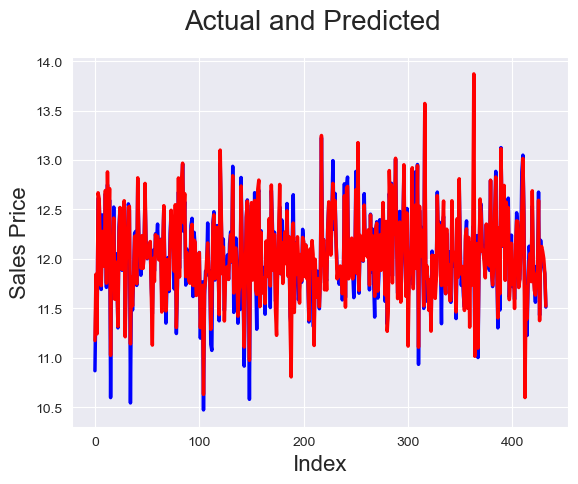

In [55]:
# Simple Linear Regression with all features: Actual vs Predicted
compare_lr = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(compare_lr, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(compare_lr, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

# Step 6: Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_r = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_r.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# Printing the best hyperparameter alpha
print(model_cv_r.best_params_)

{'alpha': 10.0}


In [58]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv_r.best_params_["alpha"]
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_Ridge = r2_score(y_train, y_pred_train)
print("Train R2_Scrore:",r2_train_Ridge)
metric_ridge.append(r2_train_Ridge)

r2_test_Ridge = r2_score(y_test, y_pred_test)
print("Test R2_Scrore:",r2_test_Ridge)
metric_ridge.append(r2_test_Ridge)

rssTrain_Ridge = np.sum(np.square(y_train - y_pred_train))
print("RSS Train:",rssTrain_Ridge)
metric_ridge.append(rssTrain_Ridge)

rssTest_Ridge = np.sum(np.square(y_test - y_pred_test))
print("RSS Test",rssTest_Ridge)
metric_ridge.append(rssTest_Ridge)

mse_train_Ridge = mean_squared_error(y_train, y_pred_train)
print("MSE Train",mse_train_Ridge)
metric_ridge.append(mse_train_Ridge**0.5)

mse_test_Ridge = mean_squared_error(y_test, y_pred_test)
print("MSE Test",mse_test_Ridge)
metric_ridge.append(mse_test_Ridge**0.5)

Train R2_Scrore: 0.9439650766005638
Test R2_Scrore: 0.8676495195533982
RSS Train: 8.01377978190142
RSS Test 11.088907289283188
MSE Train 0.007958073269018292
MSE Test 0.02560948565654316


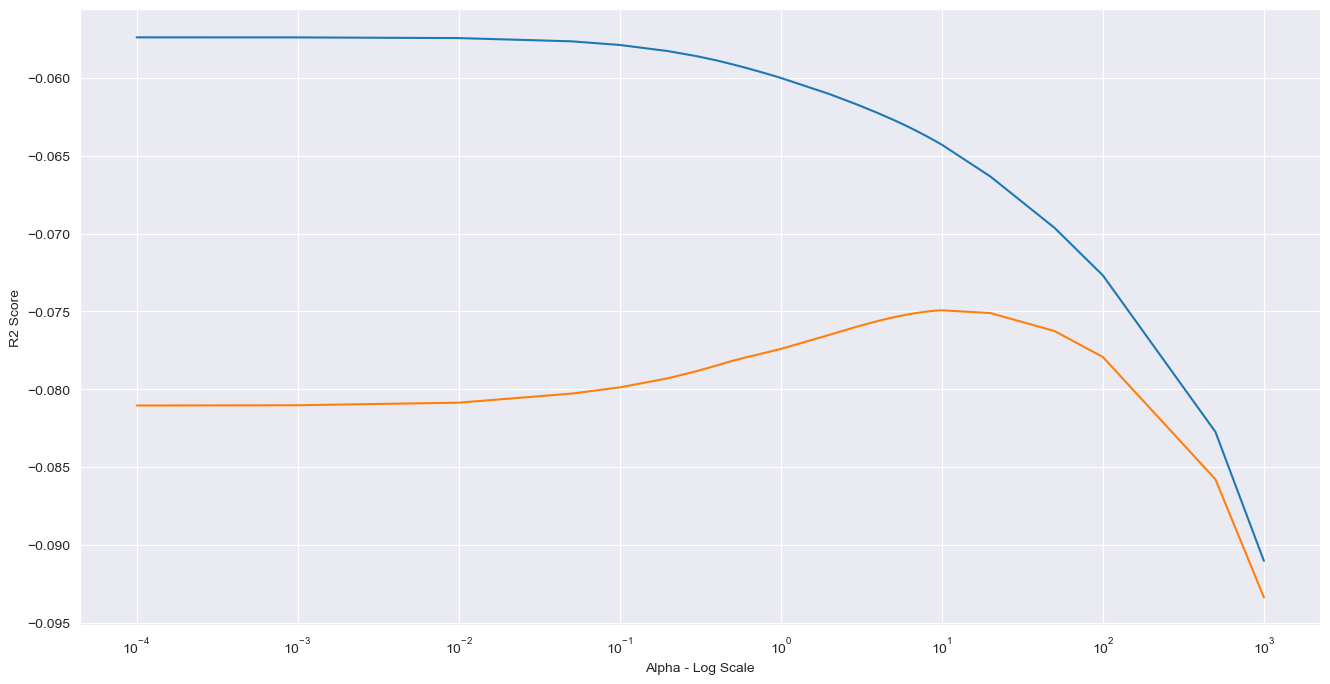

In [60]:
cv_result_ridge = pd.DataFrame(model_cv_r.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')

plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha - Log Scale')
plt.show()

Text(0, 0.5, 'Sales Price')

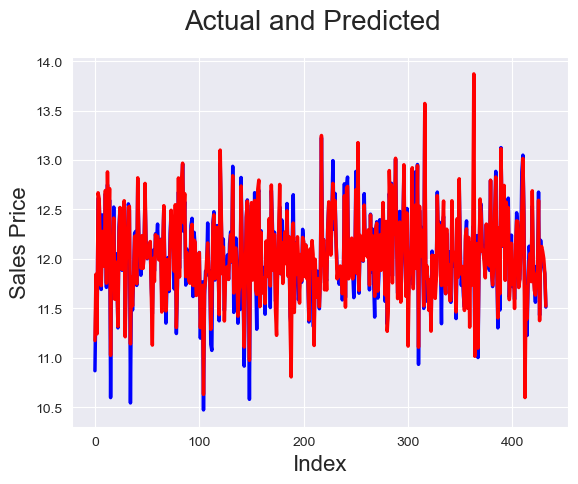

In [61]:
# Ridge Regression with all features: Actual vs Predicted
compare_ridge = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(compare_ridge, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(compare_ridge, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

# Step 7: Lasso Regression

In [62]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [64]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =model_cv_lasso.best_params_["alpha"]

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [65]:
lasso.coef_

array([-6.29054083e-03,  2.45017511e-02,  8.15711762e-02,  5.61824441e-02,
        6.72820683e-02,  1.40900817e-02,  2.70976891e-02,  0.00000000e+00,
       -0.00000000e+00,  4.21905807e-02,  0.00000000e+00,  1.96806530e-03,
       -6.53695909e-03,  1.24676162e-01,  1.47221805e-02, -1.66573466e-03,
        1.19009191e-02,  1.20811849e-03, -9.83537941e-05, -1.61086046e-02,
        7.88354322e-03,  8.45314145e-03,  2.05622464e-02,  2.49939621e-02,
        1.07914904e-02,  7.64361367e-04,  5.17874250e-03,  0.00000000e+00,
        1.57110744e-02, -2.59004508e-03, -4.50958459e-03, -4.44703069e-03,
        0.00000000e+00,  0.00000000e+00,  4.62194430e-03, -6.12935976e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.29937292e-03, -0.00000000e+00,
       -0.00000000e+00, -6.34421382e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_Lasso = r2_score(y_train, y_pred_train)
print("Train R2 Score:",r2_train_Lasso)
metric_lasso.append(r2_train_Lasso)

r2_test_Lasso = r2_score(y_test, y_pred_test)
print("Test R2 Score:",r2_test_Lasso)
metric_lasso.append(r2_test_Lasso)

rssTrain_Lasso = np.sum(np.square(y_train - y_pred_train))
print("Train RSS:",rssTrain_Lasso)
metric_lasso.append(rssTrain_Lasso)

rssTest_Lasso = np.sum(np.square(y_test - y_pred_test))
print("Test RSS:",rssTest_Lasso)
metric_lasso.append(rssTest_Lasso)

mse_train_Lasso = mean_squared_error(y_train, y_pred_train)
print("Train MSE:",mse_train_Lasso)
metric_lasso.append(mse_train_Lasso**0.5)

mse_test_Lasso = mean_squared_error(y_test, y_pred_test)
print("Test MSE:",mse_test_Lasso)
metric_lasso.append(mse_test_Lasso**0.5)

Train R2 Score: 0.9344450467578783
Test R2 Score: 0.8642342893471564
Train RSS: 9.37527754165705
Test RSS: 11.375050346722663
Train MSE: 0.009310106794098362
Test MSE: 0.026270324126380282


Text(0, 0.5, 'Sales Price')

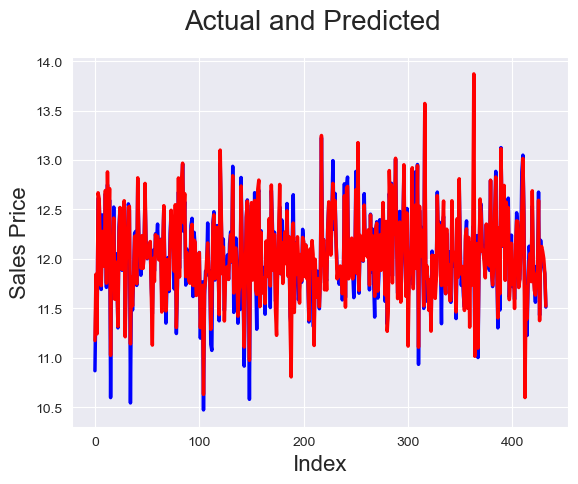

In [67]:
# Lasso Regression with all features: Actual vs Predicted
compare_lasso = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(compare_lasso, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(compare_lasso, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 

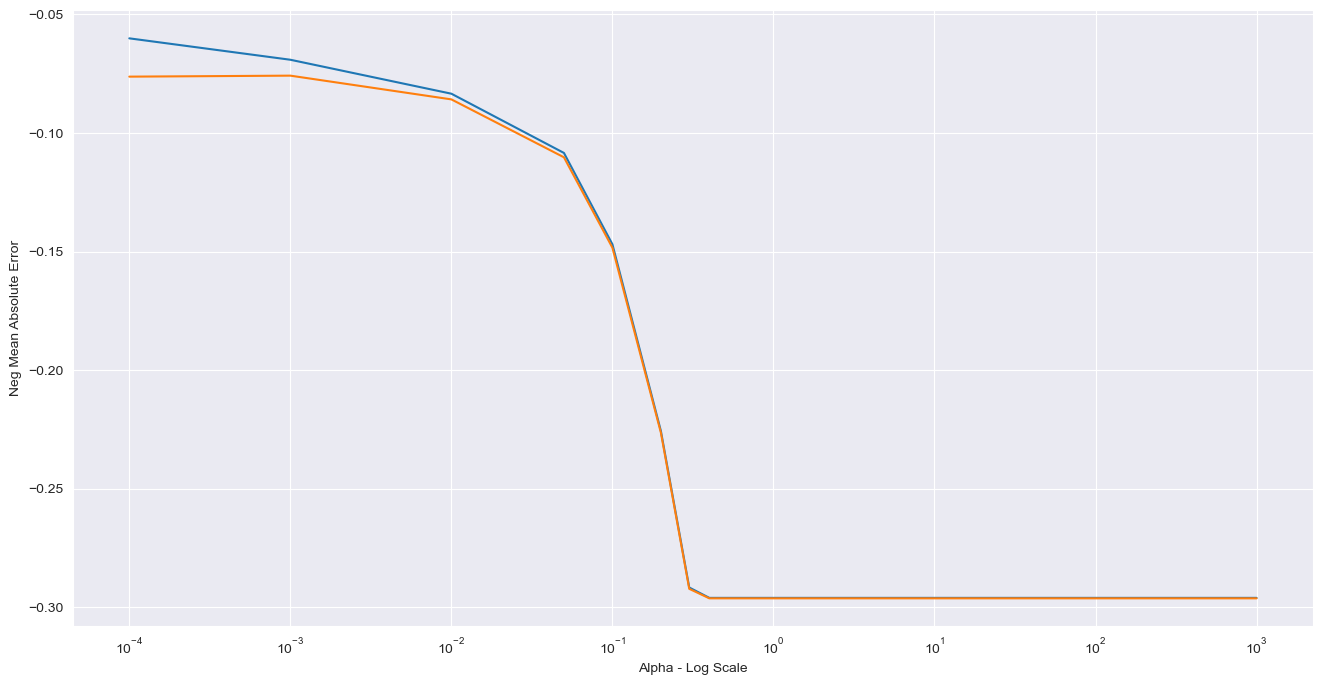

In [68]:
cv_result_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Neg Mean Absolute Error')
plt.xlabel('Alpha - Log Scale')
plt.show()

In [69]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.943965,0.934445
1,R2 Score (Test),0.867650,0.864234
2,RSS (Train),8.013780,9.375278
3,RSS (Test),11.088907,11.375050
4,MSE (Train),0.089208,0.096489
5,MSE (Test),0.160030,0.162081


## Lets observe the changes in the coefficients after regularization

In [70]:
betas = pd.DataFrame(index=X_train.columns)

In [71]:
betas.rows = X_train.columns

In [72]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
pd.set_option('display.max_rows', None)
betas.head(206)

,Ridge,Lasso
MSSubClass,-0.008830,-0.006291
LotArea,0.024666,0.024502
OverallQual,0.070600,0.081571
OverallCond,0.053987,0.056182
YearBuilt,0.057633,0.067282
YearRemodAdd,0.016673,0.014090
BsmtFinSF1,0.030459,0.027098
BsmtFinSF2,0.002860,0.000000
BsmtUnfSF,0.006451,-0.000000
TotalBsmtSF,0.041496,0.042191


# 5 most important predictor variables

In [74]:
betas['Lasso'].sort_values(ascending=False).head(5)

GrLivArea               0.124676
OverallQual             0.081571
SaleType_New            0.071213
YearBuilt               0.067282
Neighborhood_Crawfor    0.065284
Name: Lasso, dtype: float64

# Conclusion

- Optimal Value of alpha for Ridge and Lasso regression are:
    - Lambda for Ridge: 10
    - Lambda for Lasso: 0.001
- R2 for Ridge and Lasso are:
    - Ridge: Train – 94.39, Test – 86.76
    - Lasso: Train – 93.44, Test – 86.42

Looking at the above stats, it looks like both the models are doing a fairly good job, as the train R2 is
in the range of 93-94.5 and test R2 is around 86.5 for the both the models. <b>We can choose Lasso in
this case, as it helps in feature elimination, which increases the model interpretation.</b>

- 5 most important predictor variables are:
    - GrLivArea
    - OverallQual
    - SaleType_New
    - YearBuilt
    - Neighborhood_Crawfor